### Домашнее задание 2 Кузнецова Светлана Б06-905 Вариант 26

### Задача 2

2. Нелинейная система  
Система ОДУ (Модель Жакоба-Моно):  
\begin{equation}
    \frac{dx}{dt} = \frac {a}{1 + y^2} - x
\end{equation}  
\begin{equation}
    \frac{dy}{dt} = \frac {b}{1 + x^2} - y
\end{equation}  
Исследуем численно динамику системы, используя явный метод Эйлера, неявный метод Эйлера и метод Адамса 3го порядка аппроксимации  $t \in [0, 500], b = 3$, параметр $a$ увеличивается от 3 до 4. Начальные данные x(0) = 2.5, y(0) = 0.5.

In [10]:
#импорт необходимых библиотек 
import numpy as np #операции из линейной алгебры
import pandas as pd #таблицы
import matplotlib.pyplot as plt #графики
import scipy
from scipy import special as sci #для точного решения Бесселя

plt.style.use('seaborn')

In [11]:
from scipy.optimize import fsolve #библиотека для приближенного решения

Для начала введем данные функции:

In [12]:
def f1(x, y, a):
    return ((a/(1+y**2)) - x)

def f2(x, y, b):
    return ((b/(1+x**2)) - y)

#### Реализация явного метода Эйлера 

In [13]:
def eler_expl (a, t0 = 0, x0 = 2.5, y0 = 0.5, h = 0.1, b = 3):
    xar = [x0]
    yar = [y0]
    tar = [t0]
    while tar[-1] < 500:
        x = xar[-1]*(1 - h) + a/(1 + yar[-1]**2)*h
        y = yar[-1]*(1 - h) + b/(1 + xar[-1]**2)*h
        t = tar[-1] + h
        xar.append(x)
        yar.append(y)
        tar.append(t)
    return (xar, yar, tar)

#### Реализация неявного метода Эйлера 

In [14]:
def eler_nexpl (a, t0 = 0, x0 = 2.5, y0 = 0.5, h = 0.1, b = 3):
    xar = [x0]
    yar = [y0]
    tar = [t0]
    def F(x):
        return (x - xar[-1])/h - a/(1 + 1/(1+h)**2 * (b*h/(1+x**2) + yar[-1])**2) + x
    while tar[-1] < 500:
        x = fsolve(F, x0+1, xtol=1e-06, maxfev=500)[0]
        y = (yar[-1] + b*h/(1 + x**2))/(1 + h)
        t = tar[-1] + h
        xar.append(x)
        yar.append(y)
        tar.append(t)
    return (xar, yar, tar)

#### Реализация метода Адамса 3го порядка

In [15]:
def adams3(a, f1 = f1, f2 = f2, t0 = 0, x0 = 2.5, y0 = 0.5, b=3, h = 0.1):
    xar = [x0]
    yar = [y0]
    tar = [t0, t0+h, t0+2*h]
    rez = eler_expl(a, h = h) # +2 н.у. из явного метода Эйлера
    xar.append(rez[0][1])
    yar.append(rez[1][1])
    xar.append(rez[0][2])
    yar.append(rez[1][2])
    while tar[-1] < 500:
        x = xar[-1] + h*((23/12)*f1(xar[-1], yar[-1], a) - 
                         (16/12)*f1(xar[-2], yar[-2], a) + (5/12)*f1(xar[-3], yar[-3], a))
        y = yar[-1] + h*((23/12)*f2(xar[-1], yar[-1], b) - 
                         (16/12)*f2(xar[-2], yar[-2], b) + (5/12)*f2(xar[-3], yar[-3], b))
        t = tar[-1] + h
        xar.append(x)
        yar.append(y)
        tar.append(t)
    return (xar, yar, tar)

#### Теперь построим графики функций решений системы, варьируя параметр:

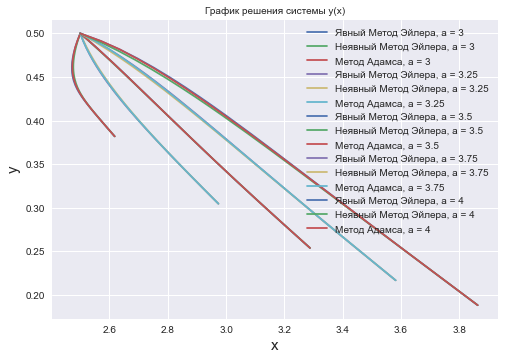

In [16]:
plt.plot (eler_expl(3)[0], eler_expl(3)[1], label = "Явный Метод Эйлера, a = 3")
plt.plot (eler_nexpl(3)[0], eler_nexpl(3)[1], label = "Неявный Метод Эйлера, а = 3")
plt.plot (adams3(3)[0], adams3(3)[1], label = "Метод Адамса, a = 3")

plt.plot (eler_expl(3.25)[0], eler_expl(3.25)[1], label = "Явный Метод Эйлера, a = 3.25")
plt.plot (eler_nexpl(3.25)[0], eler_nexpl(3.25)[1], label = "Неявный Метод Эйлера, а = 3.25")
plt.plot (adams3(3.25)[0], adams3(3.25)[1], label = "Метод Адамса, a = 3.25")

plt.plot (eler_expl(3.5)[0], eler_expl(3.5)[1], label = "Явный Метод Эйлера, a = 3.5")
plt.plot (eler_nexpl(3.5)[0], eler_nexpl(3.5)[1], label = "Неявный Метод Эйлера, а = 3.5")
plt.plot (adams3(3.5)[0], adams3(3.5)[1], label = "Метод Адамса, a = 3.5")

plt.plot (eler_expl(3.75)[0], eler_expl(3.75)[1], label = "Явный Метод Эйлера, a = 3.75")
plt.plot (eler_nexpl(3.75)[0], eler_nexpl(3.75)[1], label = "Неявный Метод Эйлера, а = 3.75")
plt.plot (adams3(3.75)[0], adams3(3.75)[1], label = "Метод Адамса, a = 3.75")

plt.plot (eler_expl(4)[0], eler_expl(4)[1], label = "Явный Метод Эйлера, a = 4")
plt.plot (eler_nexpl(4)[0], eler_nexpl(4)[1], label = "Неявный Метод Эйлера, а = 4")
plt.plot (adams3(4)[0], adams3(4)[1], label = "Метод Адамса, a = 4")

plt.legend(fontsize = 10)
plt.title("График решения системы y(x)", fontsize = 10)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show()

#### Из графика видно, что методы дают достаточно близкие по значениям решения


#### Построим зависимости решений от параметра t для каждого их методов:

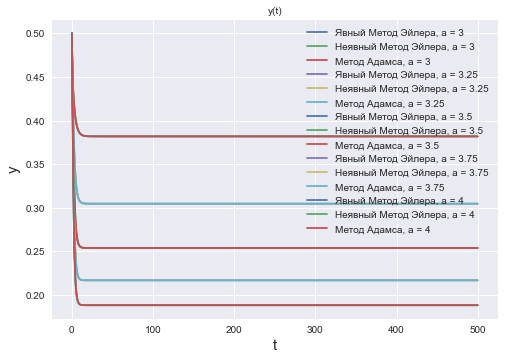

In [17]:
plt.plot (eler_expl(3)[2], eler_expl(3)[1], label = "Явный Метод Эйлера, a = 3")
plt.plot (eler_nexpl(3)[2], eler_nexpl(3)[1], label = "Неявный Метод Эйлера, а = 3")
plt.plot (adams3(3)[2], adams3(3)[1], label = "Метод Адамса, a = 3")

plt.plot (eler_expl(3.25)[2], eler_expl(3.25)[1], label = "Явный Метод Эйлера, a = 3.25")
plt.plot (eler_nexpl(3.25)[2], eler_nexpl(3.25)[1], label = "Неявный Метод Эйлера, а = 3.25")
plt.plot (adams3(3.25)[2], adams3(3.25)[1], label = "Метод Адамса, a = 3.25")

plt.plot (eler_expl(3.5)[2], eler_expl(3.5)[1], label = "Явный Метод Эйлера, a = 3.5")
plt.plot (eler_nexpl(3.5)[2], eler_nexpl(3.5)[1], label = "Неявный Метод Эйлера, а = 3.5")
plt.plot (adams3(3.5)[2], adams3(3.5)[1], label = "Метод Адамса, a = 3.5")

plt.plot (eler_expl(3.75)[2], eler_expl(3.75)[1], label = "Явный Метод Эйлера, a = 3.75")
plt.plot (eler_nexpl(3.75)[2], eler_nexpl(3.75)[1], label = "Неявный Метод Эйлера, а = 3.75")
plt.plot (adams3(3.75)[2], adams3(3.75)[1], label = "Метод Адамса, a = 3.75")

plt.plot (eler_expl(4)[2], eler_expl(4)[1], label = "Явный Метод Эйлера, a = 4")
plt.plot (eler_nexpl(4)[2], eler_nexpl(4)[1], label = "Неявный Метод Эйлера, а = 4")
plt.plot (adams3(4)[2], adams3(4)[1], label = "Метод Адамса, a = 4")

plt.legend(fontsize = 10)
plt.title("y(t)", fontsize = 10)
plt.xlabel("t", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show()

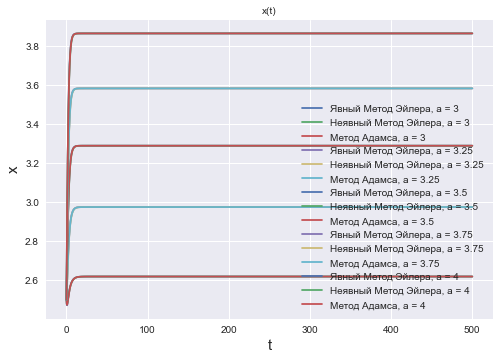

In [18]:
plt.plot (eler_expl(3)[2], eler_expl(3)[0], label = "Явный Метод Эйлера, a = 3")
plt.plot (eler_nexpl(3)[2], eler_nexpl(3)[0], label = "Неявный Метод Эйлера, а = 3")
plt.plot (adams3(3)[2], adams3(3)[0], label = "Метод Адамса, a = 3")

plt.plot (eler_expl(3.25)[2], eler_expl(3.25)[0], label = "Явный Метод Эйлера, a = 3.25")
plt.plot (eler_nexpl(3.25)[2], eler_nexpl(3.25)[0], label = "Неявный Метод Эйлера, а = 3.25")
plt.plot (adams3(3.25)[2], adams3(3.25)[0], label = "Метод Адамса, a = 3.25")

plt.plot (eler_expl(3.5)[2], eler_expl(3.5)[0], label = "Явный Метод Эйлера, a = 3.5")
plt.plot (eler_nexpl(3.5)[2], eler_nexpl(3.5)[0], label = "Неявный Метод Эйлера, а = 3.5")
plt.plot (adams3(3.5)[2], adams3(3.5)[0], label = "Метод Адамса, a = 3.5")

plt.plot (eler_expl(3.75)[2], eler_expl(3.75)[0], label = "Явный Метод Эйлера, a = 3.75")
plt.plot (eler_nexpl(3.75)[2], eler_nexpl(3.75)[0], label = "Неявный Метод Эйлера, а = 3.75")
plt.plot (adams3(3.75)[2], adams3(3.75)[0], label = "Метод Адамса, a = 3.75")

plt.plot (eler_expl(4)[2], eler_expl(4)[0], label = "Явный Метод Эйлера, a = 4")
plt.plot (eler_nexpl(4)[2], eler_nexpl(4)[0], label = "Неявный Метод Эйлера, а = 4")
plt.plot (adams3(4)[2], adams3(4)[0], label = "Метод Адамса, a = 4")

plt.legend(fontsize = 10)
plt.title("x(t)", fontsize = 10)
plt.xlabel("t", fontsize = 15)
plt.ylabel("x", fontsize = 15)
plt.show()

Построенные графики y(t), x(t) отражают динамику системы. Видно, что спустя некоторое t система приходит в "равновесие" и значение х (y) остается постоянным